## Le modèle d'un paramètre: La loi Bernoulli

Soit $X_1, \ldots, X_n$ un échantillon de Bernoulli $\mathcal{B}(p)$ avec $p=0.6$. Nous voulons estimer $p$ à partir d'une réalisation de cet échantillon $x=(x_1, \ldots, x_n)$. de $X$

**Ex1.** Simuler un échantillon i.i.d de taille $n=10$ en utilisant `rbinom`.

In [74]:
n <- 10
p <- 0.6
x <- rbinom(n,1,p) # tire n loi de bernoulli de parametre p
x
mean(x)

[1] 1 0 1 1 0 1 1 0 1 0

[1] 0.6

Quelle est une estimation simple de $p$ ?

**Ex2.** Créer une fonction de vraisemblance, nommée `L_bern`, en fonction de $(p, x)$, qui donne la vraisemblance d'un échantillon $x=(x_1,\ldots,x_n)$ pour une valeur donnée de $p$.

In [36]:
L_bern <- function(p, x){## vraisemblance
  L=1
  for(i in 1:length(x)){
    L=L*p^{x[i]}*(1-p)^(1-x[i])
  }
  return(L)
}
L_bern(p,x)

[1] 0.001194394

**Ex3.**. Pour l'échantillon généré dans l'**Ex1**, calculer la vraisemblance de cet échantillon des lois Bernoulli de paramètres $p$ allant de 0 à 1. Tracer la courbe des valeurs calculées. Que remarquez-vous?

[1] 0.000000e+00 9.605960e-13 5.903156e-11 6.453785e-10 3.478924e-09
  [6] 1.272666e-08 3.642662e-08 8.800757e-08 1.877981e-07 3.644355e-07
 [11] 6.561000e-07 1.111517e-06 1.790681e-06 2.765267e-06 4.118718e-06
 [16] 5.945977e-06 8.352895e-06 1.145528e-05 1.537767e-05 2.025171e-05
 [21] 2.621440e-05 3.340597e-05 4.196763e-05 5.203912e-05 6.375611e-05
 [26] 7.724762e-05 9.263326e-05 1.100206e-04 1.295025e-04 1.511546e-04
 [31] 1.750329e-04 2.011715e-04 2.295808e-04 2.602453e-04 2.931226e-04
 [36] 3.281419e-04 3.652035e-04 4.041779e-04 4.449061e-04 4.871997e-04
 [41] 5.308416e-04 5.755873e-04 6.211661e-04 6.672831e-04 7.136219e-04
 [46] 7.598465e-04 8.056048e-04 8.505319e-04 8.942538e-04 9.363909e-04
 [51] 9.765625e-04 1.014391e-03 1.049506e-03 1.081550e-03 1.110181e-03
 [56] 1.135079e-03 1.155950e-03 1.172527e-03 1.184582e-03 1.191921e-03
 [61] 1.194394e-03 1.191893e-03 1.184362e-03 1.171791e-03 1.154223e-03
 [66] 1.131755e-03 1.104534e-03 1.072765e-03 1.036701e-03 9.966469e-04
 [71] 9.529569e-04 9.060290e-04 8.563023e-04 8.042521e-04 7.503843e-04
 [76] 6.952286e-04 6.393321e-04 5.832513e-04 5.275436e-04 4.727589e-04
 [81] 4.194304e-04 3.680650e-04 3.191340e-04 2.730639e-04 2.302267e-04
 [86] 1.909319e-04 1.554185e-04 1.238480e-04 9.629883e-05 7.276303e-05
 [91] 5.314410e-05 3.725790e-05 2.483630e-05 1.553423e-05 8.940712e-06
 [96] 4.594324e-06 2.003860e-06 6.747073e-07 1.417348e-07 9.414801e-09
[101] 0.000000e+00

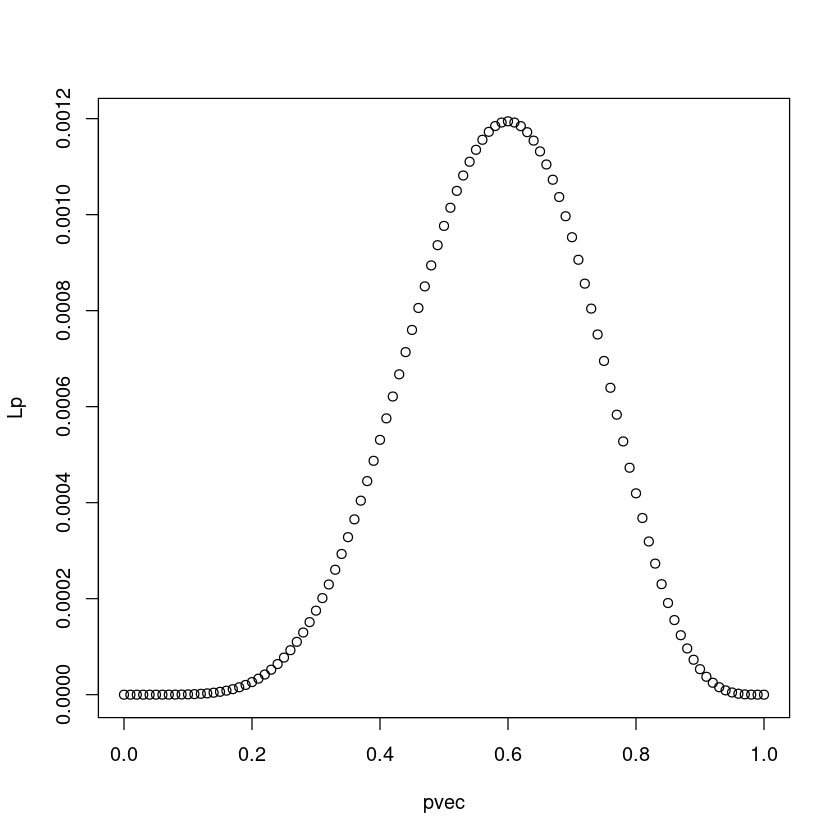

In [38]:
pvec = seq(0,1,by=0.01)
Lp = sapply(pvec, L_bern, x)
Lp
plot(pvec, Lp)

**Ex4.**. En utilisant la fonction `optim` de R, trouvez la valeur de $p$ la plus probable d'avoir généré cet échantillon. 

In [ ]:
?optim  ### la description de l'optim

In [ ]:
mL_bern <- function(p,x){ -L_bern(p,x) }
## optimization standard (minimization)
p0 = 0.5 # valueur initiale pour l'algorithme
res = optim(p0, mL_bern, x=x, method = "CG")
res

$par
[1] 0.5

$value
[1] -9.313226e-10

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

Cette méthode pour cette loi ne fonctionne pas pour des p0 trop loin de la valeur théorique pour n=10, et ne fonctionne pas du tout pour n>20

**Attention :** `optim` est par défaut une routine de **minimization**. Avec la méthode de *L-BFGS-B* dans la fonction `optim`, vous pouvez traiter des contraintes sur le(s) paramètre(s), lorsque qu'il est nécessaire.

In [78]:
## optimization avec contraintes
pmin = 0.1; pmax = 0.9 # contraintes, j'ai prix pmax moin loin
res1 = optim(p0, mL_bern, x=x, method="L-BFGS-B", lower=pmin, upper=pmax)
res1

$par
[1] 0.5999994

$value
[1] -0.001194394

$counts
function gradient 
       6        6 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

**Ex5.** Tester avec des échantillons de taille $n$ allant de $n=10$ à $n=2000$ et comparer l'écart entre la valeur théorique attendue et la valeur obtenue. Que remarquez-vous? Comment combattre l'instabilité numérique due aux multiplications de probabilités?

In [ ]:
size <- seq(10,2000, by=1)
para <- list()

for(k in size)
{
  x<-rbinom(k,1,p)
  pmin<-0
  pmax<-1
  res2 <- optim(p0, mL_bern, x=x, method="Brent", lower=pmin, upper=pmax) # Meilleurs méthode
  para[k]<-res2$par
}
para

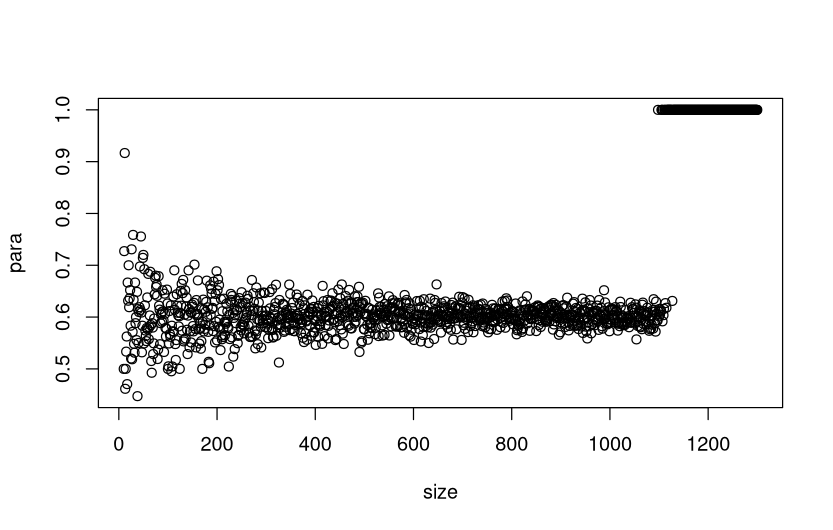

Utiliser la log-vraisemblance au lieu de la vraisemblance:


In [ ]:
log_L <- function(p,x){ -log(L_bern(p,x)) } #log vraisemblance, un - pour maximiser
size <- seq(10,2000, by=1)
para <- numeric()

for(k in seq_along(size))
{
  x<-rbinom(size[k],1,p)
  pmin<-0
  pmax<-1
  res2 <- optim(p0, log_L, x=x, method="Brent", lower=pmin, upper=pmax) # Meilleurs méthode
  para[k]<-res2$par
}
plot(size,para)

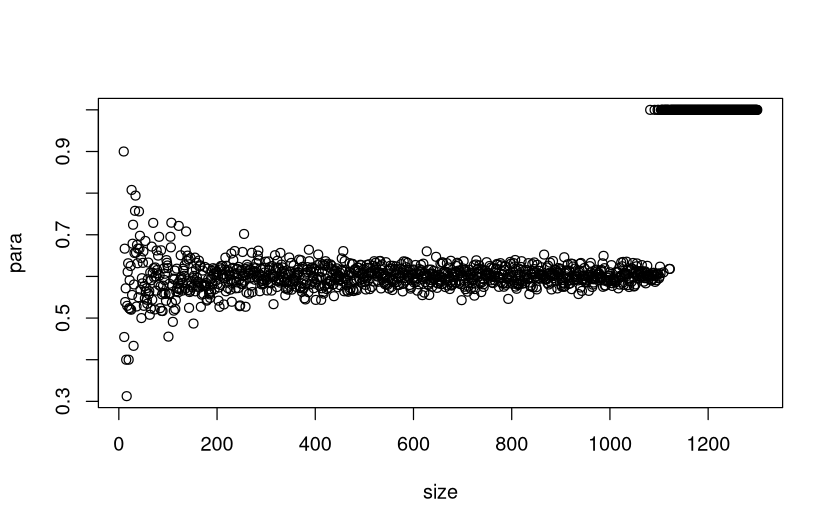

**Ex6.** Donner les intervalles de confiance de niveau 80% pour le paramètre $p$, à partir de la loi théorique asympotique.


Alternativement, donner les intervalles de confiance d’après l’inégalité de Bienaymé-Chebycheff et l’inégalité de Hoeffding.

**Ex7.** Pour $n$ fixé, simuler 500 échantillons et donner des intervalles de confiance correspondants. Vous pouvez faire varier la taille de l'échantillon et le paramètre réel. Comptez le nombre de fois où l'intervalle de confiance contient le vrai paramètre. Quelle est votre conclusion?


## Un modèle à deux paramètres: La loi Beta

Soit $X_1,\ldots,X_n$ un échantillon de $n$ variables indépendantes de loi de Beta ($\theta = (\alpha, \beta)$). Simuler un échantillon i.i.d de taille $n=50$ avec $\theta_0=c(2,3)$.


In [ ]:
n<-...
theta<-c(...)
X <- rbeta(...)
head(X)

**Ex8.** Présenter l'histogramme des données simulées. Choisir trois paramètres candidats, disons, $\theta_0$ (vrai) $\theta_1, \theta_2$. Comparer l'histogramme avec les densités candidates. Que remarquez-vous? 

In [ ]:
theta_0 <- theta
X<- rbeta(n=...,...)
theta_1 <- ...
theta_2 <- ...
xx<- seq(..., by=...)
hist(X,..., main ="...")
lines(xx,dbeta(...),col="red")
lines(xx,dbeta(...),col="blue")
legend("topright", legend=c("Beta(...)","Beta(...)"),col = c("red","blue"),lty = c(1,1))

**Ex9.** Générer une fonction de la log-vraisemblance avec les arguments $(\theta, x)$, qui donne la log-vraisemblance d'un échantillon $x = (x_1,\ldots,x_n)$ pour une valeur donnée de $\theta=(\alpha,\beta)$. Pour votre échantillon, évaluer la log-vraisemblance de paramètre $\theta=(\alpha,\beta)$, en faissant varier un paramètre à la fois, et visualizer la fonction sur $a_0 \leq\alpha \leq a_1, b_0\leq \beta \leq b_1$ pour votre choix appropriés de limites. Que remarquez-vous?

**Indication :** Pour plus de simplicité, il suffit de tracer la tranche des courbes unidimensionnelle en supposant que l'autre est fixe: $\ell(\alpha|\beta=\beta_0)$ pour plusierus valeurs de $\beta_0$ et $\ell(\beta| \alpha=\alpha_0)$ pour plusieurs valeurs de $\alpha_0$.

Nous pouvons également utiliser des visualisations 2-dim ou 3-dim avec `contour` ou `image`. Une visualisation plus avancée peut être réalisée à l'aide du mudule (`plot3D`). Voici un exemple de code.

In [ ]:
aa = seq(0.5, 5, by=...)
bb = seq(0.5, 6, by=0.2)
vtheta = expand.grid(a=aa, b=bb); vtheta

# evaluer la (negative) vraisemblance
mlogL_beta = ...
log_lik = apply(vtheta, 1, mlogL_beta, x=X)
cbind(vtheta, log_lik) 
# chercher le minimum
iopt = which.min(log_lik)
a1 = vtheta[iopt,1] 
b1 = vtheta[iopt,2]
## transformer en matrice
zmat = matrix(log_lik, nrow=length(aa), ncol=length(bb))
rownames(zmat) = aa
colnames(zmat) = bb
## contour plots
?contour
contour(aa, bb, zmat)
points(a1, b1, pch=8, col=2) ## ajouter les points minimum

**Ex10.** Donner l'expression mathématique du vecteur Score (les dérivées premières) à laquelle l'EMV répond et trouver l'information de Fisher.
En utilisant la fonction `optim`, trouver l'estimateur du maximum de vraisemblance. Quelle est la loi asymptotique d'estimateur?


**Ex11.** Construire des intervalles de confiance asymptotique de niveau $0.90$. Incluent-ils les vrais paramètres ? Tester avec des échantillons de taille $n=20$ et $n=100$. Quel est l'effet de la taille de l'échantillon ?

**Ex12.** Répéter l'estimation 100 fois avec de nouveaux ensembles de données et tracer les valeurs estimées $\hat\alpha$ vs $\hat\beta$. Sont-elles indépendantes ?
Visualisez vos résultats à l'aide d'un histogramme. 
Ajoutez la densité de la loi asymptotique. Que remarquez-vous?

**Ex13.** Réalisez une étude de simulation pour évaluer la performance des intervalles de confiance et résumez vos conclusions.